In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import hvplot
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# 1. Extract the numeric columns for scaling
numeric_columns = df_market_data.select_dtypes(include=['float64', 'int64']).columns

# 2. Scale the numeric columns using StandardScaler
scaler = StandardScaler()
df_scaled_values = scaler.fit_transform(df_market_data[numeric_columns])


In [8]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(df_scaled_values, columns=numeric_columns, index=df_market_data.index)

# Copy the crypto names from the original DataFrame
crypto_names = df_market_data.index.copy()

# Set the coin_id column as index
df_scaled['coin_id'] = crypto_names
df_scaled.set_index('coin_id', inplace=True)

# Display the scaled DataFrame
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [11]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [12]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(df_scaled)
    
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

#Display the inertia values
print(inertia_values)


[287.0, 212.1233420748626, 170.19357087970295, 79.02243535120975, 71.0979135124442, 66.1088267804475, 54.48812315624117, 43.224692666580424, 32.86088447122681, 28.404884636873092, 24.1161984214092]


In [13]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': list(range(1, 12)),  # k-values from 1 to 11
    'inertia': inertia_values  # Inertia values calculated earlier
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


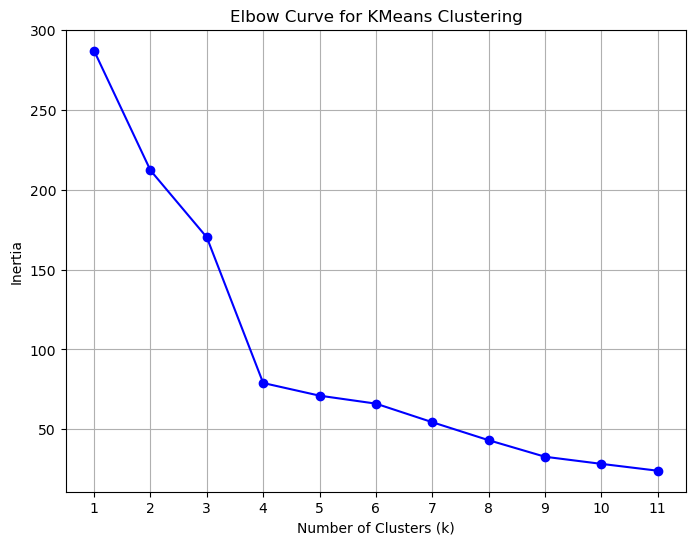

In [14]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 12))  # Ensure x-axis shows integers 1 to 11
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Based on your Elbow Curve, the best value for k is the one where the inertia starts to level off after a significant drop in value. That is 3.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [18]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=3, random_state=42)  # Set the number of clusters (k) to 3


In [25]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [20]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_labels = kmeans.predict(df_scaled) 

# Print the resulting array of cluster values.
print("Cluster Labels:", cluster_labels)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Cluster


In [ ]:
# Create a copy of the scaled DataFrame
df_scaled_copy = df_scaled.copy()


In [ ]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
cluster_labels = kmeans.predict(df_scaled)

# Display the copy of the scaled DataFrame
df_scaled_copy['Cluster'] = cluster_labels 

In [ ]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = df_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",  # x-axis: 24-hour price change percentage
    y="price_change_percentage_7d",   # y-axis: 7-day price change percentage
    c="Cluster",                      # Color the points by their cluster labels (Cluster column)
    hover_cols=["coin_id"],            # Display cryptocurrency names on hover
    cmap='Category10',                 # Optional: Choose a color map (e.g., Category10)
    height=500,                        # Set the height of the plot
    width=800
)

# Step 2: Display the plot
scatter_plot

---

### Optimize Clusters with Principal Component Analysis.

In [ ]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [ ]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
pca_data = pca.fit_transform(df_scaled)

# down to three principal components.
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])


# View the scaled PCA data
print(pca_df.head())

In [ ]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

# Display the explained variance ratio
print("Explained Variance Ratio for each component:")
print(explained_variance)


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components will be the sum of the individual explained variance ratios. Total Explained Variance=1.000813857455

In [ ]:
# Create a new DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names (coin_id) from the original scaled DataFrame
# Assuming the 'coin_id' column is still available in the original DataFrame (df_market_data)
pca_df['coin_id'] = df_market_data.index

# Set the coin_id column as index
pca_df.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
print(pca_df.head())


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [ ]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [ ]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia for each value of k (from 1 to 11)
for k in range(1, 12):
    # Create a KMeans model using the loop counter for n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the data using df_market_data_pca
    kmeans.fit(pca_df)  # Assuming df_pca contains the PCA-reduced data
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Print the inertia values
print(inertia_values)

In [ ]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': list(range(1, 12)),  # k-values from 1 to 11
    'inertia': inertia_values  # Inertia values from previous step
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


In [ ]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The besrt value for `k` is 3.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** the best k value might differ between the original and PCA data due to the dimensionality reduction, noise removal, and the overall structure of the data in reduced dimensions.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [ ]:
# Initialize the K-Means model using the best value for k
k_best = 3 
kmeans_model = KMeans(n_clusters=k_best, random_state=42)


In [ ]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(pca_df)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
cluster_labels = kmeans_model.predict(pca_df)

# Print the resulting array of cluster values (cluster labels for each cryptocurrency)
print(cluster_labels)


In [ ]:
# Create a copy of the scaled PCA DataFrame
df_pca_copy = pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_copy['cluster'] = cluster_labels

# Display the copy of the scaled PCA DataFrame
print(df_pca_copy.head())


In [ ]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot = df_pca_copy.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    c='cluster',  # Color by the cluster labels
    cmap='viridis',  # Color map to visually differentiate clusters
    hover_cols=['crypto_name'],  # Show the crypto names on hover
    title="PCA Scatter Plot with K-Means Clusters",  # Title of the plot
    width=800,  # Width of the plot
    height=600  # Height of the plot
)

# Display the plot
scatter_plot

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [ ]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!

# Create an empty list to store the inertia values for PCA
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k for the PCA-reduced data
for k in range(1, 12):
    # Create a KMeans model using the loop counter for n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the PCA-reduced data
    kmeans.fit(pca_df)  # pca_df is the DataFrame with the PCA-reduced data
    
    # Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans.inertia_)

# Create a dictionary with the data for plotting the Elbow curve for PCA
pca_elbow_data = {
    'k': list(range(1, 12)),  # k-values from 1 to 11
    'inertia': inertia_values_pca  # Inertia values for PCA
}

# Create a DataFrame with the data to plot the Elbow curve for PCA
pca_elbow = pd.DataFrame(pca_elbow_data)

# Create a figure for the composite plot with 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the Elbow curve for the original data
ax[0].plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-', color='b')
ax[0].set_title('Elbow Curve for Original Data')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('Inertia')

# Plot the Elbow curve for the PCA-reduced data
ax[1].plot(pca_elbow['k'], pca_elbow['inertia'], marker='o', linestyle='-', color='r')
ax[1].set_title('Elbow Curve for PCA Data')
ax[1].set_xlabel('Number of Clusters (k)')
ax[1].set_ylabel('Inertia')

# Display the composite plot
plt.tight_layout()
plt.show()


In [ ]:
import hvplot.pandas
import holoviews as hv  # Import holoviews for plot options
from holoviews import opts  # Import opts explicitly
hv.extension('bokeh')  # Ensure the bokeh extension is enabled

# Create a scatter plot for the original scaled data with KMeans cluster labels
scatter_original = df_scaled.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    c="Cluster", 
    cmap="Category10", 
    hover_cols=['coin_id'], 
    title="Clusters in Original Data"
)

# Create a scatter plot for the PCA-reduced data with KMeans cluster labels
scatter_pca = pca_df.hvplot.scatter(
    x="PC1", 
    y="PC2", 
    c="Cluster", 
    cmap="Category10", 
    hover_cols=['coin_id'], 
    title="Clusters in PCA-reduced Data"
)

# Combine both scatter plots into one figure (layout)
layout = scatter_original + scatter_pca

# Set options for the plot size and layout configuration
layout.opts(
    opts.Scatter(width=600, height=400),  # Set size of scatter plots using holoviews opts
    opts.Layout(shared_axes=False)  # Ensure both plots have independent axes
)

# Show the combined layout
layout


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Reducing the number of features for clustering can make the process more efficient and help focus on the key components of the data, but it also runs the risk of losing valuable information that could improve the clustering's accuracy.